In [1]:
!pipx install pandas numpy matplotlib sklearn sklearn

Note: Dependent package 'numpy' contains 2 apps
  - f2py
  - numpy-config

No apps associated with package pandas. Try again with '--include-deps' to
include apps of dependent packages, which are listed above. If you are
attempting to install a library, pipx should not be used. Consider using pip
or a similar tool instead.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Read CSV (use correct path)
data = pd.read_csv("/home/hardik/Desktop/python_intern/archive/City_time_series.csv")
print("Shape:", data.shape)

# Inspect data
print(data.info())
print("Described Data:\n", data.describe())
print("Columns in dataset:\n", data.columns)

Shape: (3762566, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762566 entries, 0 to 3762565
Data columns (total 81 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Date                                                           object 
 1   RegionName                                                     object 
 2   InventorySeasonallyAdjusted_AllHomes                           float64
 3   InventoryRaw_AllHomes                                          float64
 4   MedianListingPricePerSqft_1Bedroom                             float64
 5   MedianListingPricePerSqft_2Bedroom                             float64
 6   MedianListingPricePerSqft_3Bedroom                             float64
 7   MedianListingPricePerSqft_4Bedroom                             float64
 8   MedianListingPricePerSqft_5BedroomOrMore                       float64
 9   MedianListingPricePerSqft

In [2]:
# Focus on 'ZHVI_AllHomes' (exists)
print("\nData stats for ZHVI_AllHomes:")
print("Mean:", data['ZHVI_AllHomes'].mean())
print("Median:", data['ZHVI_AllHomes'].median())
print("Std:", data['ZHVI_AllHomes'].std())


Data stats for ZHVI_AllHomes:
Mean: 189616.50115619498
Median: 142500.0
Std: 179050.1622020596


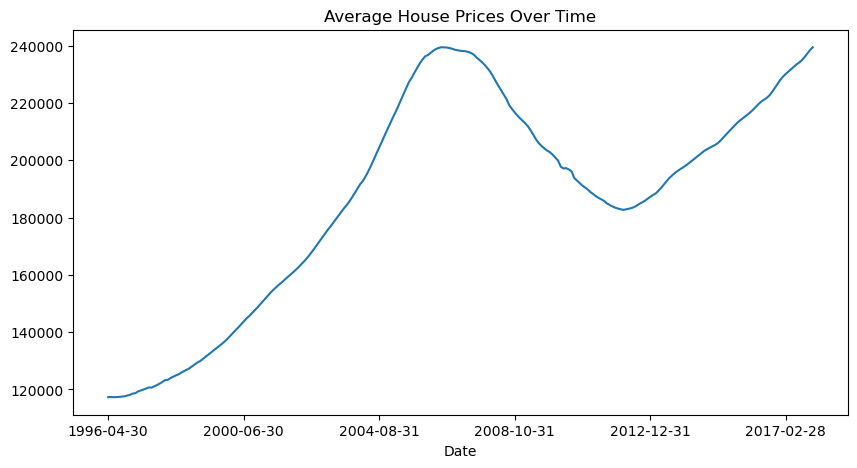

Step 1 done.


In [3]:
# Average house price over time
avg_prices = data.groupby('Date')['ZHVI_AllHomes'].mean()
avg_prices.plot(figsize=(10, 5), title='Average House Prices Over Time')
plt.show()

print("Step 1 done.")

In [4]:
# Handle missing values
print("Missing values:\n", data.isnull().sum().head())
data.ffill(inplace=True)
print("Missing values handled.")

# Remove outliers based on ZHVI_AllHomes
q_low = data['ZHVI_AllHomes'].quantile(0.01)
q_high = data['ZHVI_AllHomes'].quantile(0.99)
data = data[(data['ZHVI_AllHomes'] > q_low) & (data['ZHVI_AllHomes'] < q_high)]

print("Outliers removed.")

# Normalize house prices
scaler = MinMaxScaler()
data[['ZHVI_AllHomes']] = scaler.fit_transform(data[['ZHVI_AllHomes']])

print("Normalization complete.")

Missing values:
 Date                                          0
RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    2990822
InventoryRaw_AllHomes                   2990822
MedianListingPricePerSqft_1Bedroom      3754896
dtype: int64
Missing values handled.
Outliers removed.
Normalization complete.


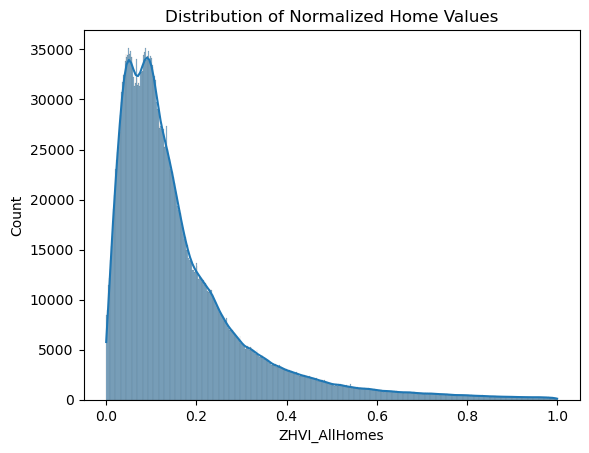

In [5]:
# Plot histogram
sns.histplot(data['ZHVI_AllHomes'], kde=True)
plt.title("Distribution of Normalized Home Values")
plt.show()

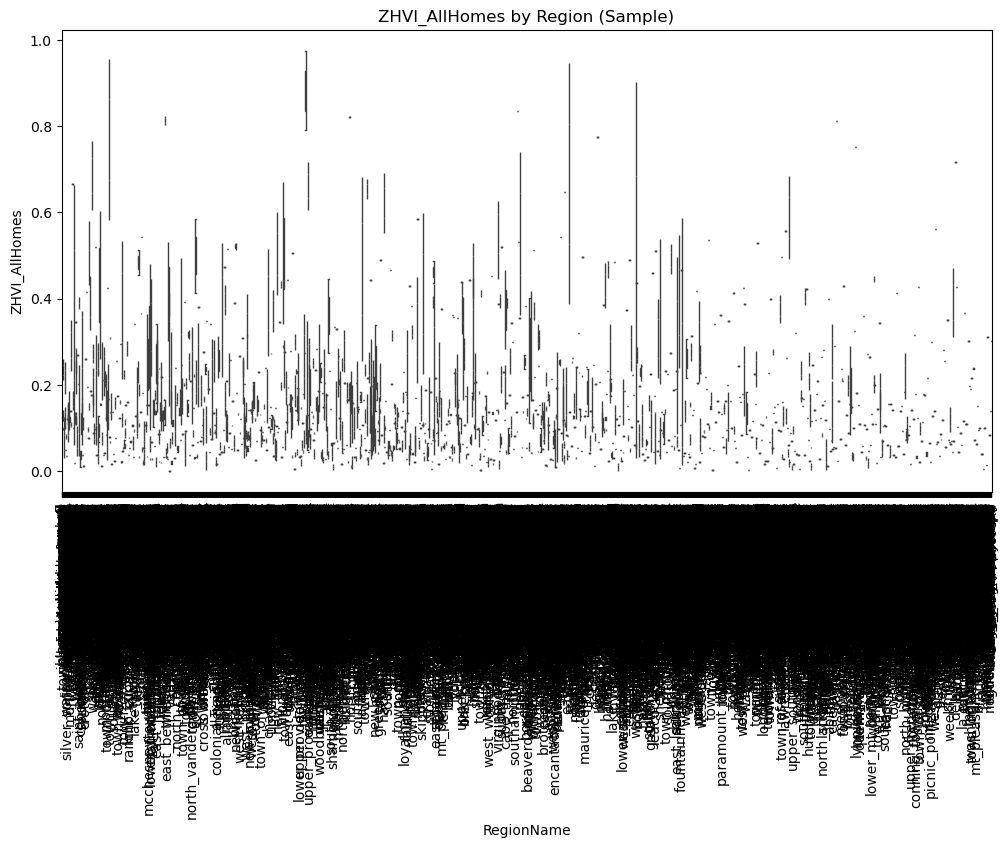

In [6]:
# Optional: sample for speed
sample_data = data.sample(5000, random_state=42)

# Boxplot by region (may be large)
plt.figure(figsize=(12, 6))
sns.boxplot(x='RegionName', y='ZHVI_AllHomes', data=sample_data)
plt.xticks(rotation=90)
plt.title("ZHVI_AllHomes by Region (Sample)")
plt.show()

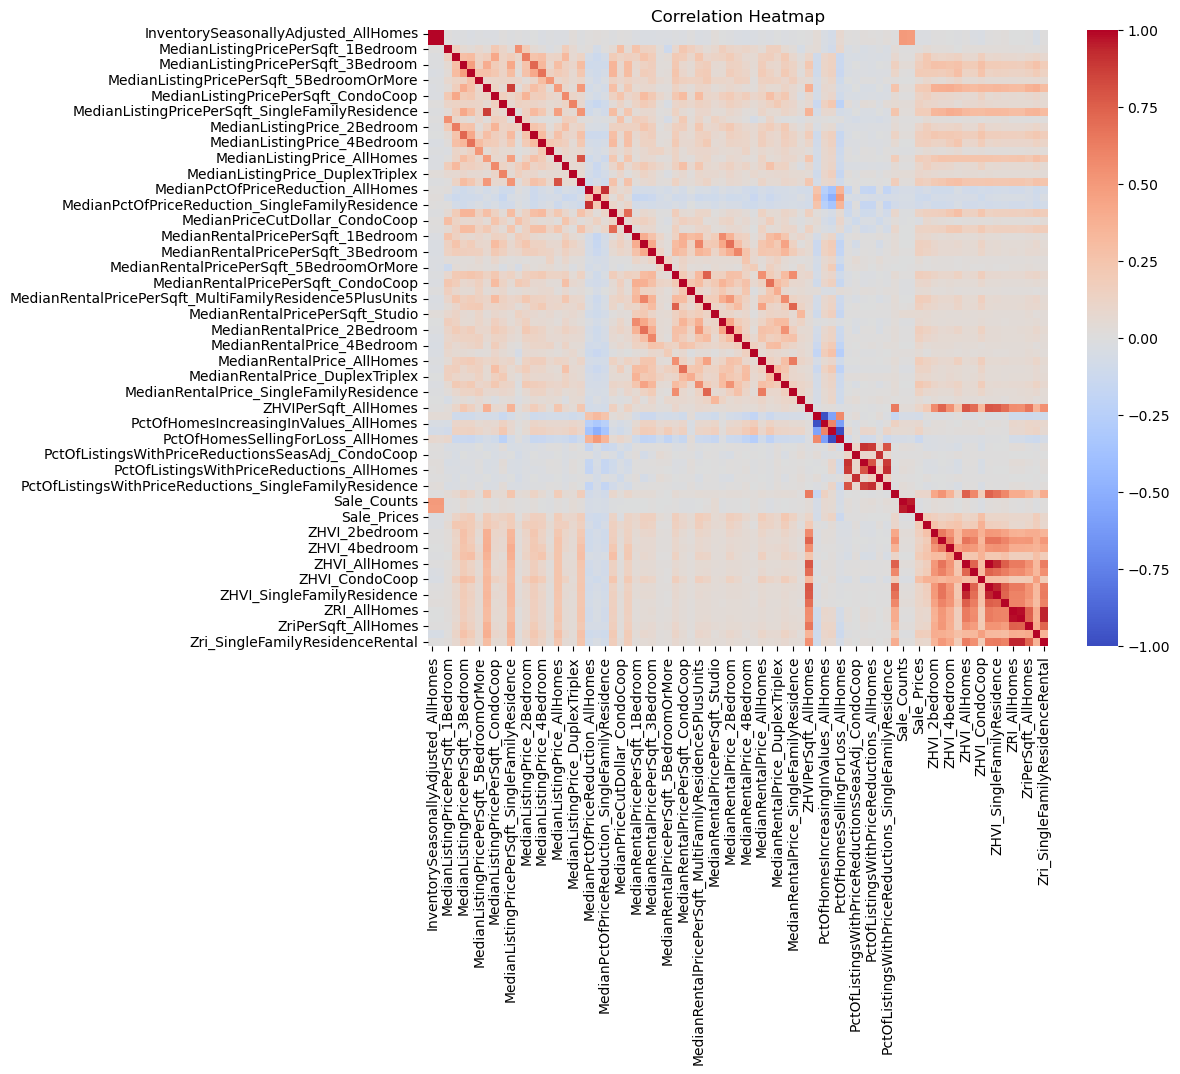

In [7]:
# Correlation heatmap
corr = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# Extract Year
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Convert StateName to dummy variables if present
if 'StateName' in data.columns:
    data = pd.get_dummies(data, columns=['StateName'], drop_first=True)

# Drop unnecessary columns
data.drop(['Date'], axis=1, inplace=True, errors='ignore')

print("Final dataset shape:", data.shape)
print("All steps completed successfully.")

Final dataset shape: (3686828, 81)
All steps completed successfully.
